<a href="https://colab.research.google.com/github/Untick/Marketplaces/blob/Moseeva-Evgenia-branch/Ozon_marketplace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Проект: Прогнозирование продаж товаров на маркетплейсах**


**Техническое задание (ТЗ) для проекта AI:**

**Основная цель: Разработка и реализация алгоритмов AI для выполнения следующих подзадач:**

- Определение корреляции по всем параметрам статистики для понимания работы алгоритмов в разных категориях и их зависимостей.
- Прогнозирование продаж для любого клиента в категории на основе общих продаж всех продавцов в этой категории.
- Прогнозирование продаж товара в нескольких вариантах с учетом данных общих продаж, статистики товара и аудита карточки товара.
Входные данные: Большой набор данных с метриками с маркетплейса.

**Технологический стек: Python, Pandas, Scikit-Learn, TensorFlow/Keras, Git/GitHub для версионирования кода.**

Методология разработки: Гибкая методология разработки, с еженедельными спринтами и ежедневными вопросами в чате для обсуждения прогресса и проблем.

## **1.Определение корреляции по всем параметрам статистики для понимания работы алгоритмов в разных категориях и их зависимостей.**

In [1]:
import matplotlib.pyplot as plt # Импортируем модуль pyplot библиотеки matplotlib для построения графиков
import pandas as pd # Импортируем библиотеку обработки и анализа данных pandas
pd.set_option('display.max_columns', None) # Устанавливаем максимальное количество отображаемых колонок
import seaborn as sns; sns.set() #визуализация
import plotly.graph_objects as go #визуализация 3D
import numpy as np # здесь она используется для создания координатной сетки
                   #(с помощью функции np.meshgrid) и для расчета
                   #значений матрицы корреляций (с помощью функции correlations.values)
                   # и для работы с массивами
from sklearn.preprocessing import LabelEncoder # это класс из библиотеки scikit-learn (sklearn),
                                               #который используется для кодирования меток классов в числовой формат.
                                               #Это часто используется в задачах машинного обучения, когда требуется преобразовать
                                               #категориальные значения в числовые, чтобы модели машинного обучения могли работать
                                               #с этими данными.

In [2]:
# Для загрузки данных используем drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### **1.1 Загрузка, осмотр, предобработка данных и EDA.**

Путь к файлу: /content/gdrive/MyDrive/УИИ/Стажировка/База.csv

#### **1.1.1 Работаем с файлом baza.csv**

In [3]:
# Загружаем базу
baza = pd.read_csv('/content/gdrive/MyDrive/УИИ/Стажировка/baza.csv',sep=";")
baza.head()

,Артикул,Ozon Product ID,FBO OZON SKU ID,FBS OZON SKU ID,Barcode,Наименование товара,Контент-рейтинг,Бренд,Статус товара,Видимость FBO,Причины скрытия FBO (при наличии),Видимость FBS,Причины скрытия FBS (при наличии),Дата создания,Коммерческая категория,"Объем товара, л","Объемный вес, кг","Доступно на складе Ozon, шт","Вывезти и нанести КИЗ (кроме Твери), шт","Зарезервировано, шт","Доступно на моих складах, шт","Зарезервировано на моих складах, шт","Текущая цена с учетом скидки, руб.","Цена до скидки (перечеркнутая цена), руб.","Цена Premium, руб.","Рыночная цена, руб.",Актуальная ссылка на рыночную цену,"Размер НДС, %"
0,'30273,105606938,298131117,298131122,2000000036618,Плата B003809.2 заднего фонаря BMW X3 F25 (дра...,'15,GNX,Продается,Показывается,NaN,Показывается,NaN,2021-08-03 10:32:38,Фонарь задний для авто,'1.00,'0.2,0,0,0,26,0,1200.0,1800.0,NaN,NaN,NaN,0%
1,'30383,105742204,298264198,298264234,2000000037899,Биксеноновая линза GNX Hella 3R Crystal Vision...,'37.5,GNX,Продается,Показывается,NaN,Показывается,NaN,2021-08-03 14:58:10,Фара автомобильная,'3.00,'0.6,0,0,0,410,0,1990.0,3500.0,NaN,NaN,NaN,0%
2,'31284,112525698,303785665,303785701,NaN,Светодиодные линзы Bi-Led AOZOOM A3 Max 5500K ...,'30,Aozoom,Продается,Показывается,NaN,Показывается,NaN,2021-08-16 09:48:31,Фара автомобильная,'6.30,'1.3,0,0,0,10,0,7900.0,NaN,NaN,NaN,NaN,0%
3,'25775,175507357,409388811,409388809,2000000005034,Герметик для фар жесткий бутиловый черный (4 м...,'17.5,GNX,Продается,Показывается,NaN,Показывается,NaN,2021-12-02 08:31:59,Фара автомобильная,'1.88,'0.6,0,0,0,873,0,1200.0,NaN,NaN,NaN,NaN,0%
4,'29740,175521273,409666236,409666237,2000000030531,Линзы ксенон для фар Ford Focus 2 2007-2011 (C...,'15,GNX,Продается,Показывается,NaN,Показывается,NaN,2021-12-02 08:48:02,Фара автомобильная,'6.00,'1.2,0,0,0,47,0,4500.0,6300.0,NaN,NaN,NaN,0%


Посмотрим общую информацию

In [4]:
baza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1263 entries, 0 to 1262
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Артикул                                    1263 non-null   object 
 1   Ozon Product ID                            1263 non-null   int64  
 2   FBO OZON SKU ID                            1263 non-null   int64  
 3   FBS OZON SKU ID                            1263 non-null   int64  
 4   Barcode                                    1205 non-null   object 
 5   Наименование товара                        1263 non-null   object 
 6   Контент-рейтинг                            1263 non-null   object 
 7   Бренд                                      1258 non-null   object 
 8   Статус товара                              1263 non-null   object 
 9   Видимость FBO                              1263 non-null   object 
 10  Причины скрытия FBO (при

In [5]:
# Смотрим период времени данных
print("Минимальная дата создания:", baza['Дата создания'].min())
print("Максимальная дата создания:", baza['Дата создания'].max())


Минимальная дата создания: 2021-05-05 14:03:42
Максимальная дата создания: 2023-05-04 10:59:28


In [6]:
# Смотрим какие есть уникальные категории товаров
unique_category = baza['Коммерческая категория'].unique()
print(unique_category)

['Фонарь задний для авто' 'Фара автомобильная'
 'Комплектующие для ксеноновых фар' 'Автохимия - Герметик, клей'
 'Лампа автомобильная' 'Разное автопринадлежности']


**Вывод:**  
Данные (файл База.csv или здесь звучит как baza.csv)выгружены из личного кабинета продавца в Ozon. Этот отчет в личном кабинете продавца называется Product. Для решения поставленной задачи, Заказчик проекта обогатил и скомпонавал нужными нам данными из других отчётов  для решения задач этого Проекта. Таким образом, мы будем пользоваться данными файла Аналитика Графики 01.06.2022-31.05.2023 или в этом ноутбуке звучит как analysts.xlsx.

#### **1.1.2 Работаем с файлом analysts.xlsx**

Путь к файлу: /content/gdrive/MyDrive/УИИ/Стажировка/analysts.xlsx

In [7]:
# Загружаем базу и смотрим первые пять строк.
analysts = pd.read_excel('/content/gdrive/MyDrive/УИИ/Стажировка/analysts.xlsx')
analysts.head()

,Категория 3-го уровня,Товары,Модель,Ozon ID,Артикул,День,"Уникальные посетители, всего",Уникальные посетители с просмотром карточки товара,"Показы, всего",Показы на карточке товара,Показы в поиске и каталоге,Позиция в поиске и каталоге,"В корзину, всего",Заказано товаров,Отменено товаров,Доставлено (за выбранный период),Возвращено товаров,Заказано на сумму,"Отправления с премиум-подпиской, принятые в обработку"
0,Лампа автомобильная,Светодиодные лампы GNX NEON H1 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966074308,34599,2023-05-07,1,1,1,1,0,"0,00",0,0,0,0,0,0,0
1,Лампа автомобильная,Светодиодные лампы GNX NEON H1 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966074305,34599,2023-05-04,4,0,5,0,4,"364,25",0,0,0,0,0,0,0
2,Лампа автомобильная,Светодиодные лампы GNX NEON H1 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966074305,34599,2023-05-05,12,2,18,2,5,"6,40",0,0,0,0,0,0,0
3,Лампа автомобильная,Светодиодные лампы GNX NEON H1 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966074305,34599,2023-05-06,4,1,4,1,2,"156,00",0,0,0,0,0,0,0
4,Лампа автомобильная,Светодиодные лампы GNX NEON H1 6000K,"Светодиодные лампы GNX NEON H11 6000K, энергоэ...",966074305,34599,2023-05-07,14,2,16,2,9,"229,78",0,0,0,0,0,0,0


In [8]:
# Смотрим общую информацию датафрейма
analysts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 254748 entries, 0 to 254747
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count   Dtype 
---  ------                                                 --------------   ----- 
 0   Категория 3-го уровня                                  254748 non-null  object
 1   Товары                                                 254748 non-null  object
 2   Модель                                                 211411 non-null  object
 3   Ozon ID                                                254748 non-null  int64 
 4   Артикул                                                254748 non-null  object
 5   День                                                   254748 non-null  object
 6   Уникальные посетители, всего                           254748 non-null  int64 
 7   Уникальные посетители с просмотром карточки товара     254748 non-null  int64 
 8   Показы, всего                               

Наши данные содержат 254748 строк и 19 столбцов. Тип данных в 6 столбцах object и в 13 столбца тип данных int64. В столбце "День" нужно изменить тип данных с object на datetime. В столбце "Артикул" стоит тип данных object, хотя скорей всего там стоят числовые значения, нужно поисследовать эти данные и при необходимости их обработать, если они нам будут нужны для решения задач в Проекте.



In [9]:
# Найдём дубликаты
analysts.duplicated().sum()

1

In [10]:
# Удалим дубликаты
analysts = analysts.drop_duplicates()

#### **1.1.3 Предобработка и EDA**

Преобразуем столбец `День`:

In [11]:
# Изменим тип данных с object на Дату
analysts['День'] = pd.to_datetime(analysts['День'])

In [12]:
# Смотрим за какой период представлены данные
print("Минимальная дата создания:", analysts['День'].min())
print("Максимальная дата создания:", analysts['День'].max())

Минимальная дата создания: 2022-06-01 00:00:00
Максимальная дата создания: 2023-05-31 00:00:00


Преобразуем столбец `Позиция в поиске и каталоге`:

In [13]:
#Заменим запятую на точку в числовых значениях  столбца "Позиция в поиске и каталоге", воспользовавшись методом .replace()
analysts['Позиция в поиске и каталоге'] = analysts['Позиция в поиске и каталоге'].replace(',', '.', regex=True)
# Изменим тип данных с object на float
analysts['Позиция в поиске и каталоге'] = analysts['Позиция в поиске и каталоге'].astype(float)

Исследуем столбец ``Артикул``. Смущает, что в столбце на первый взгляд стоят числа, но тип данных object.

In [14]:
# Посмотрим какие уникальные значения в столбце
unique_values = analysts['Артикул'].unique()
print(unique_values)

['34599' '34601' '34597' '34598' '34218' '34219' '30932' '34538' '34539'
 '34536' '33640' '33614' '33632' '33914' '30399' '31302' '30985' '33639'
 '30401' '33635' '30986' '31094' '29885' '33638' '30275' '30400' '33618'
 '34414' '34227' '33756' '33786' '30914' '30915' '30265' '30266' '30261'
 '29189' '28935' '26552' '29193' '28166' '29187' '28936' '28999' '29184'
 '30267' '28939' '26176' '26178' '28114' '28926' '26175' '29154' '28928'
 '28937' '28933' '29186' '28924' '28115' '29442' '26562' '24793' '30260'
 '26551' '29444' '28938' '29446' '30268' '29185' '30262' '29443' '28930'
 '30263' '28929' '29190' '30271' '33782' '34205' '28934' '34206' '30270'
 '34281' '34203' '33792' '34221' '30936' '34207' '30933' '30269' '34204'
 '33793' '34224' '33819' '34220' '30937' '33810' '33784' '33787' '30931'
 '33791' '34222' '30934' '33962' '33961' '34193' '28722' '28849' '25625'
 '25624' '28870' '26824' '28182' '26964' '26925' '25626' '34216' '34158'
 '34153' '34156' '34157' '34154' '34155' '34159' '3

Мы видим, что есть записи :числа с латинскими буквами: FL10NS,FL25W и т.д. Создадим отдельный датафрейм `object_values`, в который запишем такие данные:

In [15]:
# В этом коде мы используем метод .str.contains(), чтобы проверить наличие комбинации чисел и букв в каждой ячейке столбца analysts['Артикул'].
# Параметр regex=True указывает использовать регулярное выражение в поиске, а na=False отбрасывает пропущенные значения.
# Регулярное выражение r'\d.*[a-zA-Z]|[a-zA-Z].*\d' ищет комбинацию числа и буквы в строке.
# Если такая комбинация обнаружена, соответствующая строка будет включена в результат.
object_values = analysts[analysts['Артикул'].str.contains(r'\d.*[a-zA-Z]|[a-zA-Z].*\d', regex=True, na=False)]


In [16]:
# Посмотрим общую информацию получившегося датафрейма `object_values`
object_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119 entries, 252191 to 253300
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count  Dtype         
---  ------                                                 --------------  -----         
 0   Категория 3-го уровня                                  119 non-null    object        
 1   Товары                                                 119 non-null    object        
 2   Модель                                                 119 non-null    object        
 3   Ozon ID                                                119 non-null    int64         
 4   Артикул                                                119 non-null    object        
 5   День                                                   119 non-null    datetime64[ns]
 6   Уникальные посетители, всего                           119 non-null    int64         
 7   Уникальные посетители с просмотром карточки товара     119 non-

У нас отсортировалось 119 записей. Доля таких данных составляет 0,05% (119/254748*100=0,05%)

In [17]:
# Посмотрим уникальные артикулы в столбце "Артикул"
unique_artikul = object_values['Артикул'].unique()
print(unique_artikul)

['FL25W' 'FL10VW' 'FL10NS' '2A50']


Получилось , что 4 артикула имеют в оформлении цифры и латинские буквы в 119 строках. Теперь найдём долю этих артикулов в общем числе уникальных артикулов.

In [18]:
# Посчитаем количество уникальных аритикулов в датафрейме analysts
analysts['Артикул'].nunique()

994

Таким образом доля артикулов 'FL25W', 'FL10VW', 'FL10NS', '2A50' в общем датафрейме analysts составляет: 0,4% (119/994*100).  
 Для чистоты эксперимента будет лучше удалить эти аномальные данные, для того, чтобы тип данных столбца `Артикул` изменить с object на целочисленный.

In [19]:
# Используем метод drop(), передаем индексы этих строк в index=object_values.index,
# чтобы удалить соответствующие строки из исходного датафрейма analysts.

analysts = analysts.drop(index=object_values.index)
analysts['Артикул'] = analysts['Артикул'].astype(int)

In [20]:
# Проверка данных в датафрейме
analysts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254628 entries, 0 to 254747
Data columns (total 19 columns):
 #   Column                                                 Non-Null Count   Dtype         
---  ------                                                 --------------   -----         
 0   Категория 3-го уровня                                  254628 non-null  object        
 1   Товары                                                 254628 non-null  object        
 2   Модель                                                 211292 non-null  object        
 3   Ozon ID                                                254628 non-null  int64         
 4   Артикул                                                254628 non-null  int64         
 5   День                                                   254628 non-null  datetime64[ns]
 6   Уникальные посетители, всего                           254628 non-null  int64         
 7   Уникальные посетители с просмотром карточки товара     2

Все получилось! Мы преобразовали типы данных в столбцах `День`, `Позиция в поиске и каталоге`и в  `Артикул`.

**Выполним исследовательский анализ данных(EDA)**

EDA мы будем проводить в направлении поиска корреляций в данных.  Поэтому при необходимости будем выполнять дополнительные преобразования: добавлять столбцы с новыми расчётами, удалять лишние столбцы и пр.  
Начнём с описательной статистики:

In [21]:
analysts.describe().T

,count,mean,std,min,25%,50%,75%,max
Ozon ID,254628.0,5.455757e+08,8.741163e+07,260902271.0,510662709.0,5.115731e+08,5.784897e+08,966074308.0
Артикул,254628.0,2.771564e+04,7.967049e+03,139.0,26788.0,2.973800e+04,3.097600e+04,34601.0
"Уникальные посетители, всего",254628.0,4.966025e+01,2.202782e+02,0.0,4.0,1.000000e+01,3.000000e+01,12798.0
Уникальные посетители с просмотром карточки товара,254628.0,1.861653e+00,9.181210e+00,0.0,0.0,0.000000e+00,1.000000e+00,838.0
"Показы, всего",254628.0,8.791001e+01,4.162419e+02,0.0,5.0,1.400000e+01,4.700000e+01,20098.0
Показы на карточке товара,254628.0,2.924867e+00,1.587694e+01,0.0,0.0,0.000000e+00,1.000000e+00,1665.0
Показы в поиске и каталоге,254628.0,2.876400e+01,1.468513e+02,0.0,2.0,6.000000e+00,2.000000e+01,10774.0
Позиция в поиске и каталоге,254628.0,1.329888e+02,1.834617e+02,0.0,31.0,8.696000e+01,1.677500e+02,4584.0
"В корзину, всего",254628.0,2.144030e-01,1.136372e+00,0.0,0.0,0.000000e+00,0.000000e+00,106.0
Заказано товаров,254628.0,3.701871e-02,2.730429e-01,0.0,0.0,0.000000e+00,0.000000e+00,20.0


Выполним доп.вычисления: посмотрим суммы по столбцам `Заказано товаров`и `Отменено товаров`

In [22]:
print("Сумма по столбцу 'Заказано товаров':", analysts['Заказано товаров'].sum())
print("Сумма по столбцу 'Отменено товаров':", analysts['Отменено товаров'].sum())

Сумма по столбцу 'Заказано товаров': 9426
Сумма по столбцу 'Отменено товаров': 480


Доля отменённых товаров по независимым причинам составила 5,1%

In [23]:
# Найдём уникальные категорий товаров в наших данных:
unique_categories = analysts['Категория 3-го уровня'].unique()
print(unique_categories)

['Лампа автомобильная' 'Комплектующие светодиодной лампы для авто'
 'Комплектующие для ксеноновых фар' 'Разное автопринадлежности'
 'Фара автомобильная' 'Фонарь задний для авто' 'Другое'
 'Автохимия - Герметик, клей' 'Светодиодный модуль']


Преобразуем столбец 'Категория 3-го уровня' в числовой формат.  
Для этого мы используем метод LabelEncoder из библиотеки scikit-learn.
 Преобразование LabelEncoder нумерует каждую уникальную категорию от 0 до N-1, где N - количество уникальных категорий:

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
analysts['Категория 3-го уровня_encoded'] = label_encoder.fit_transform(analysts['Категория 3-го уровня'])
unique_categories_encoded = analysts['Категория 3-го уровня_encoded'].unique()
print(unique_categories_encoded)

[4 3 2 5 7 8 1 0 6]


Для проверки узнаем, какому номеру соответствует каждая уникальная категория, будем использовать метод inverse_transform() у объекта label_encoder:  

In [25]:
unique_categories_encoded = analysts['Категория 3-го уровня'].unique()
encoded_categories = label_encoder.transform(unique_categories_encoded)

for category, encoded_category in zip(unique_categories_encoded, encoded_categories):
    print(f'{category}: {encoded_category}')

Лампа автомобильная: 4
Комплектующие светодиодной лампы для авто: 3
Комплектующие для ксеноновых фар: 2
Разное автопринадлежности: 5
Фара автомобильная: 7
Фонарь задний для авто: 8
Другое: 1
Автохимия - Герметик, клей: 0
Светодиодный модуль: 6


**Построим матрицу корреляций и отобразим её**

<ipython-input-40-61e522e370d9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data=analysts.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')


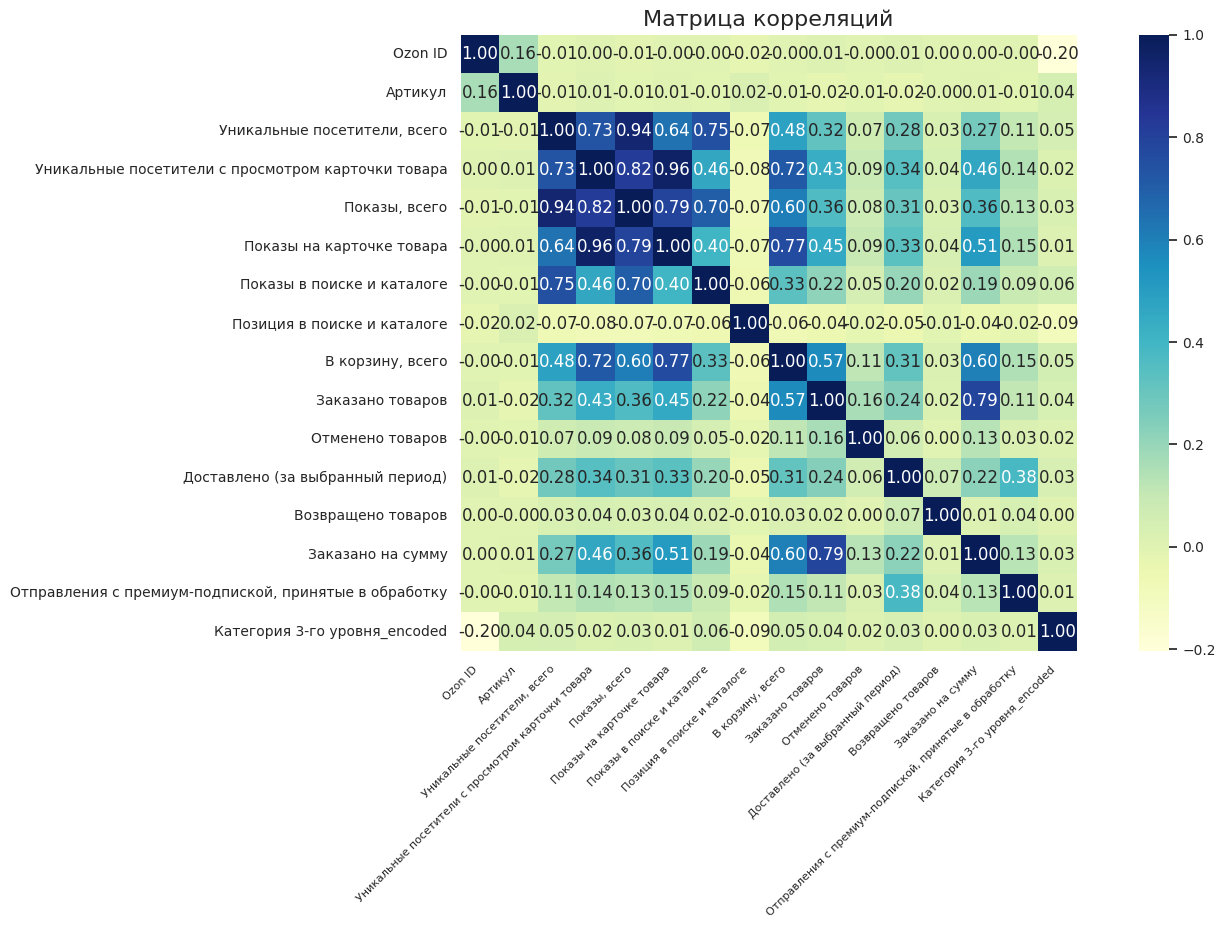

In [40]:
plt.figure(figsize=(16, 8), dpi=100)
heatmap = sns.heatmap(data=analysts.corr(), annot=True, fmt='.2f', square=True, cmap='YlGnBu')
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.yticks(rotation=0, fontsize=10)
plt.title('Матрица корреляций', fontsize=16)
plt.show()

**Вывод:**

Явной зависимости категорий от признаков не обнаружено.

Имеются пять мультиколлинеарных признака:
1.Уникальные посетители - Показы,всего(0,94);  
2.Уникальные посетители с просмотром карточки товара - Показы на карточке товара(0,96);   
3. Показы всего - Уникальные посетители с просмотроо карточки товара (0,82);  
4. Заказано на сумму - Заказано товаров (0,79);  
5. Заказано товаров - В корзину всего (0,57)

Подготовка:  

Думаю, что для чистоты эксперимента нужно будет убрать по одному мультиколлинеарному признаку. И после удаления, данные можно считать подготовленными и можно строить Модель прогнозирования продаж.

Дополнительно, я подготовила графики отдельно для каждой категории:

In [41]:
# В этом коде мы создаем цикл, который проходит по каждой указанной категории в списке categories.
# Внутри цикла мы фильтруем данные DataFrame по текущей категории и создаем график heatmap только для подвыборки данных,
# относящихся к этой категории.
#Заголовок графика также будет содержать текущую категорию.
categories = ['Разное автопринадлежности', 'Фара автомобильная', 'Лампа автомобильная',
              'Автохимия - Герметик, клей', 'Противотуманные фары',
              'Комплектующие для ксеноновых фар', 'Фонарь задний для авто',
              'Светодиодный модуль', 'Комплектующие светодиодной лампы для авто', 'Другое']

for category in categories:
    fig = go.Figure()
    subset = analysts[analysts['Категория 3-го уровня'] == category]
    correlations = subset.corr()

    corr_matrix = correlations.values
    x, y = np.meshgrid(correlations.columns, correlations.columns)

    fig.add_trace(go.Surface(x=x, y=y, z=corr_matrix, colorscale='Viridis',
                             reversescale=True, colorbar=dict(title='Корреляция'),
                             hovertemplate='Корреляция: %{z:.2f}'))

    fig.update_layout(scene=dict(xaxis_title='', yaxis_title='', zaxis_title='Корреляция'),
                      title=dict(text='3D Матрица корреляции - ' + category, x=0.5),  # Название графика посередине экрана
                      scene_xaxis_tickfont=dict(size=10),
                      scene_yaxis_tickfont=dict(size=10),
                      width=1300, height=800)

    fig.show()

<ipython-input-41-95fbe245c15c>:13: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



### **1.2 Общий вывод**

В этом разделе я:  
1. Загрузила два файла. Решила, буду пользоваться данными файла Аналитика Графики 01.06.2022-31.05.2023 или в этом ноутбуке звучит как analysts.xlsx.;
2.  Выполнила преобразование типы данных в столбцах День, Позиция в поиске и каталоге и в Артикул.;   
3. Для чистоты эксперимента удалила строки с  артикулами 'FL25W', 'FL10VW', 'FL10NS', '2A50' Их доля составляет менее 0,4% в общем датафрейме analysts ;  
4. Выполнила исследовательский анализ данных(EDA);  
5. Преобразовала столбец 'Категория 3-го уровня' в числовой формат для построения Модели обучения;  
6. Построила общую матрицу корреляции и отдельно для каждой категории;  
7. Обнаружила пять мультиколлинеарных признака:   
- Уникальные посетители - Показы,всего(0,94);  
- Уникальные посетители с просмотром карточки товара - Показы на карточке товара(0,96);  
- Показы всего - Уникальные посетители с просмотром карточки товара (0,82);  
- Заказано на сумму - Заказано товаров (0,79);  
- Заказано товаров - В корзину всего (0,57);  
8. Пришла к выводу, но не очень уверена,что для построения Модели прогнозирования нужно удадить эти пять мультиколлинеарных признака.  

